# 1. 자동 미분

In [1]:
import tensorflow as tf

In [2]:
w = tf.Variable(2.)

def f(w):
    y = w ** 2
    z = 2 * y + 5
    return z

In [3]:
with tf.GradientTape() as tape:
    z = f(w)
    
gradients = tape.gradient(z, [w]) # 자동 미분
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


# 2. 자동 미분 선형 회귀

In [4]:
W = tf.Variable(4.0)
b = tf.Variable(1.0)

@tf.function
def hypothesis(x):
    return W*x + b 

In [5]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [6]:
X = [1,2,3,4,5,6,7,8,9]
y = [11,22,33,44,53,66,77,97,95]

@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred-y)) 

In [7]:
optimizer = tf.optimizers.SGD(0.01)

In [8]:
for i in range(301):
    with tf.GradientTape() as tape:
        y_pred = hypothesis(X)
        cost = mse_loss(y_pred, y)
        
    gradients = tape.gradient(cost, [W, b])
    
    optimizer.apply_gradients(zip(gradients, [W, b]))
    
    if i%10 == 0:
        print("epoch: {:3} | W의 값: {:5.4f} | b의 값: {:5.4} | cost: {:5.6f}".format(i, W.numpy(), b.numpy(), cost))

epoch:   0 | W의 값: 8.3911 | b의 값: 1.687 | cost: 1533.666626
epoch:  10 | W의 값: 10.7796 | b의 값: 1.957 | cost: 12.256893
epoch:  20 | W의 값: 10.7959 | b의 값: 1.854 | cost: 12.148647
epoch:  30 | W의 값: 10.8115 | b의 값: 1.756 | cost: 12.048960
epoch:  40 | W의 값: 10.8265 | b의 값: 1.662 | cost: 11.957135
epoch:  50 | W의 값: 10.8409 | b의 값: 1.571 | cost: 11.872578
epoch:  60 | W의 값: 10.8547 | b의 값: 1.484 | cost: 11.794700
epoch:  70 | W의 값: 10.8680 | b의 값: 1.401 | cost: 11.722973
epoch:  80 | W의 값: 10.8807 | b의 값: 1.321 | cost: 11.656911
epoch:  90 | W의 값: 10.8929 | b의 값: 1.244 | cost: 11.596081
epoch: 100 | W의 값: 10.9046 | b의 값:  1.17 | cost: 11.540049
epoch: 110 | W의 값: 10.9158 | b의 값:   1.1 | cost: 11.488448
epoch: 120 | W의 값: 10.9266 | b의 값: 1.032 | cost: 11.440929
epoch: 130 | W의 값: 10.9370 | b의 값: 0.9668 | cost: 11.397155
epoch: 140 | W의 값: 10.9469 | b의 값: 0.9043 | cost: 11.356840
epoch: 150 | W의 값: 10.9564 | b의 값: 0.8443 | cost: 11.319721
epoch: 160 | W의 값: 10.9656 | b의 값: 0.7867 | cost: 11

In [9]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.900024 55.491467 61.02195  66.55243 ]


# 3. Keras 선형 회귀

In [10]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [11]:
x = [1,2,3,4,5,6,7,8,9]
y = [11,22,33,44,53,66,77,87,95]

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

model.fit(X, y, batch_size=1, epochs=300, shuffle=False)

Epoch 1/300
9/9 [==============================] - 1s 2ms/step - loss: 547.3576 - mse: 547.3576
Epoch 2/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4751 - mse: 2.4751
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4445 - mse: 2.4445
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4153 - mse: 2.4153
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3873 - mse: 2.3873
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3605 - mse: 2.3605
Epoch 7/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3349 - mse: 2.3349
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3104 - mse: 2.3104
Epoch 9/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2869 - mse: 2.2869
Epoch 10/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2644 - mse: 2.2644
Epoch 11/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2

9/9 [==============================] - 0s 3ms/step - loss: 1.7006 - mse: 1.7006
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7005 - mse: 1.7005
Epoch 178/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7005 - mse: 1.7005
Epoch 179/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7004 - mse: 1.7004
Epoch 180/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7003 - mse: 1.7003
Epoch 181/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7003 - mse: 1.7003
Epoch 182/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7002 - mse: 1.7002
Epoch 183/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7002 - mse: 1.7002
Epoch 184/300
9/9 [==============================] - 0s 2ms/step - loss: 1.7001 - mse: 1.7001
Epoch 185/300
9/9 [==============================] - 0s 3ms/step - loss: 1.7001 - mse: 1.7001
Epoch 186/300
9/9 [==============================] - 0s 3ms/step - loss: 1

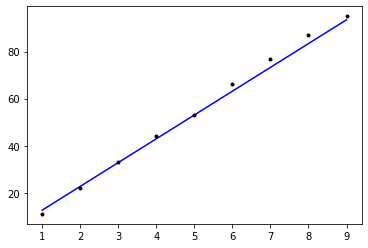

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, model.predict(X), 'b', X, y, 'k.')

In [13]:
print(model.predict([9.5]))

[[98.55645]]
